In [38]:
# imports 
import pandas as pd
import numpy as np 
import seaborn as sbs
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.stats import skew, kurtosis, spearmanr

In [39]:
dataset = pd.read_csv('AmesHousing.csv', sep='\t')

localCopy=dataset.copy(deep=True)
localCopy.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [40]:
#SEPARATION OF CATEGORICAL AND NUMERICAL FEATURES

#AmesExplanations.txt indicates a separation of the data in 4 types:
# Continuous - numerical
# Nominal - categorical
# Ordinal - usually categorical, numerical if order matters
# Discrete - usually numerical, categorical if it's an ID

cat_features = ['MS SubClass','MS Zoning','Street','Alley',
                'Lot Shape','Land Contour','Utilities','LotConfig',
                'Land Slope','Neighborhood','Condition 1','Condition 2',
                'Bldg Type','House Style','Roof Style','Roof Matl',
                'Exterior 1','Exterior 2','Mas Vnr Type','Foundation',
                'Heating','Central Air','Electrical','Garage Type',
                'Paved Drive','Misc Feature','Sale Condition']

num_features = ['Lot Frontage','Lot Area','Overall Qual','Overall Cond',
                'Year Built','Year Remod/Add','Mas Vnr Area','Exter Qual',
                'Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
                'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFinType 2','BsmtFin SF 2',
                'Bsmt Unf SF','Total Bsmt SF','HeatingQC','1st Flr SF','2nd Flr SF',
                'Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
                'Full Bath','Half Bath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd',
                'Functional','Fireplaces','FireplaceQu',
                'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual',
                'Garage Cond','Wood Deck SF','Open Porch SF','Enclosed Porch','3-Ssn Porch',
                'Screen Porch','Pool Area','Pool QC','Fence','Misc Val','Mo Sold','Yr Sold',
                'Sale Type','SalePrice']


# Features that describe a grade (ex. Quality: 1-10 or Poor/Average/Excellent) will be treated as
# numeric values. There are string values as well; these will be mapped to numbers so that the model
# understands them

# to be mapped to numbers: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure,
# BsmtFin Type 1, BsmtFinType 2, HeatingQC, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Sale Type

ordinal_maps = {'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Bsmt Exposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                'BsmtFin Type 1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFinType 2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                'FireplaceQu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Finish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
                'Garage Qual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Garage Cond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Pool QC': {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
                'Fence': {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4},
                'Sale Type': {'Oth':1, 'ConLD':2, 'ConLI':3, 'ConLw':4, 'Con':5, 'COD':6, 'New':7, 'VWD':8, 'CWD':9, 'WD':10}
                }

# apply the mappings to the strings
for col,mapping in ordinal_maps.items():
    if col in localCopy.columns:
        localCopy[col] = localCopy[col].map(mapping)

In [41]:
#FEATURE ENGINEERING: Deletion

#dropping the PID , Order Column
# Yr Sold, Sale Price, Year Built, Total Bsmt SF, Gr Liv Area because they have a high correlation with 
# other features, we are gonna keep them and delete the others
localCopy.drop(columns=['PID','Order','Overall Qual', 'Garage Yr Blt', '1st Flr SF','TotRms AbvGrd', 'Garage Cars'],inplace=True)
localCopy.drop(index=[1341,1497,1577,2236],inplace=True)

#After all deletions, remove the deleted features in the 2 cat/num separation arrays as well
cat_features = [col for col in cat_features if col in localCopy.columns]
num_features = [col for col in num_features if col in localCopy.columns]
#Also do the same for the ordinal_maps
ordinal_maps = {col: mapping for col,mapping in ordinal_maps.items() if col in localCopy.columns}

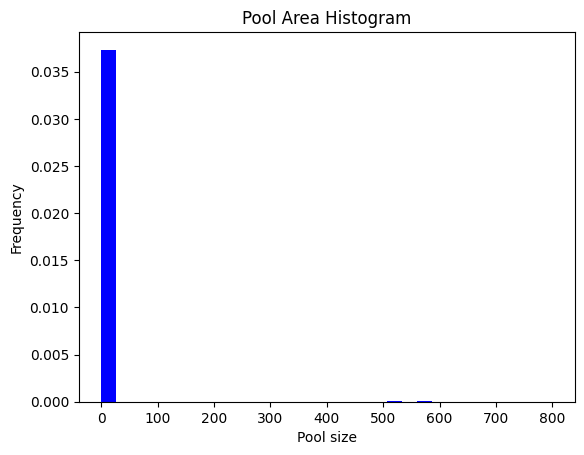

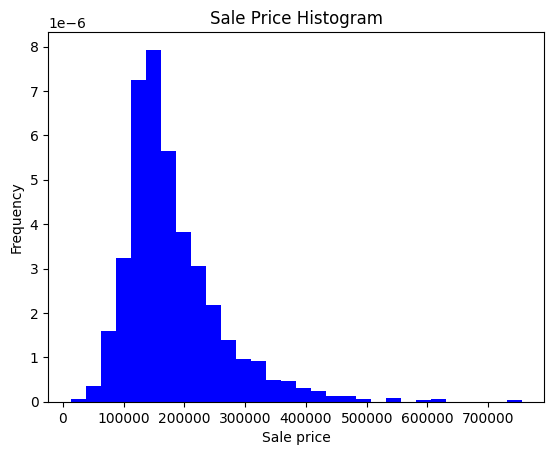

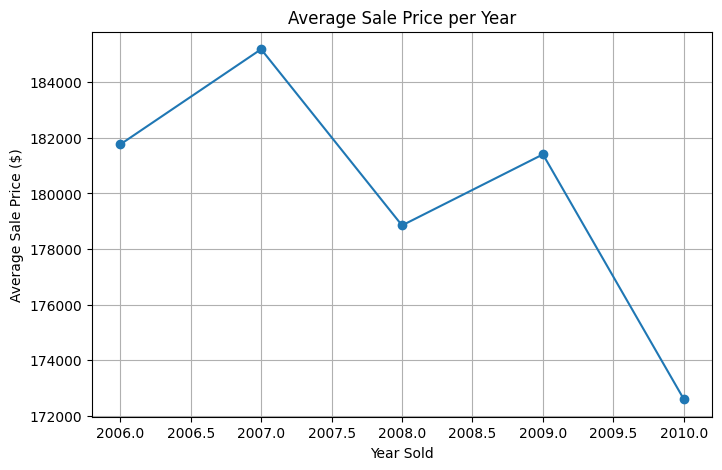

In [42]:
plt.hist(localCopy["Pool Area"],bins=30, color='blue', density=True)
plt.title('Pool Area Histogram')
plt.xlabel('Pool size')
plt.ylabel('Frequency')
plt.show()

plt.hist(localCopy["SalePrice"],bins=30, color='blue', density=True)
plt.title('Sale Price Histogram')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.show()

localCopy.groupby('Yr Sold')['SalePrice'].mean().plot( marker='o',figsize=(8,5))
plt.title('Average Sale Price per Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)
plt.show()

In [43]:
# plot the pair of columns for liniarity

# def verif_num(col1: str, col2: str)-> bool:
#     return is_numeric_dtype(dataset[col1]) and is_numeric_dtype(dataset[col2]) and col1 != col2

# cols = list(dataset.columns)
# for col1 in cols[2:]:
#     for col2 in cols[2:]:
#         if verif_num(col1, col2):
#             sbs.regplot(data=dataset[[col1, col2]], x=col1, y= col2)
#             plt.show()


# what to consider for working home: 
#  1. get rid of those non liniar plots 
#  2. resize some of the plots so that the scale is more meanningful 
#  3. reason the logic of the correlation of the features 
#  (what the reasoning means: if the features are categorical but encoded as numbers)
#  : if the pair has nothing to do with each other

In [ ]:
#skewness and kurtosis for numerical data
for col in num_features:   # pe localCopy[num_features], nu pe num_features
    sk=skew(num_features[col],nan_policy='omit')
    kr=kurtosis(num_features[col],nan_policy='omit')
    if abs(sk)>2:
        print(f"Skewness: {sk}, {col}")
    if abs(kr)>3:
        print(f"Kurtosis: {kr}, {col}")

C:\Users\phili\AppData\Local\Temp\ipykernel_6040\330304624.py:3: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  sk=skew(localCopy[num_features],nan_policy='omit')
C:\Users\phili\AppData\Local\Temp\ipykernel_6040\330304624.py:4: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  kr=kurtosis(localCopy[num_features],nan_policy='omit')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
correlation_matrix= localCopy[num_features].corr()

high_corr_pairs=[]

cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        x = cols[i]
        y = cols[j]
        corr = correlation_matrix.loc[x, y]  
        if abs(corr) > 0.75:
            high_corr_pairs.append((x, y, corr))

for col1, col2, corr in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sbs.regplot(data=dataset, x=col1, y=col2, color="green", line_kws=dict(color="r"))
    plt.title(f"{col1} vs {col2}\nCorrelation: {corr:.3f}")
    plt.tight_layout()
    plt.show()

ValueError: Boolean array expected for the condition, not int64

In [ ]:
#FEATURE ENGINEERING: Scaling
from sklearn.preprocessing import MinMaxScaler

#Scalam doar features numerice; acestea trebuie sa fie numere toate
# --> avem si stringuri, le transformam acum in numere
for col,mapping in ordinal_maps.items():
    if col in localCopy.columns:
        localCopy[col] = localCopy[col].map(mapping)

#Facem scale
scaler = MinMaxScaler()
scaled_data = localCopy.copy(deep=True)
scaled_data[num_features] = scaler.fit_transform(localCopy[num_features])

print(scaled_data)